In [3]:
import pandas as pd

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)

preprocess - split and standardize

In [5]:
from sklearn.cross_validation import train_test_split

In [6]:
X, y= df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
X_train_std = sc.fit_transform(X_train)

In [11]:
X_test_std = sc.transform(X_test)

Covariance and eigenvalue, eigenvectors calculation

In [12]:
import numpy as np

In [13]:
cov_mat = np.cov(X_train_std.T)

In [15]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [16]:
print('\nEigen Values: \n%s' % eigen_vals)


Eigen Values: 
[4.86046705 2.44308418 1.51045155 0.96470399 0.84492077 0.66275121
 0.53059569 0.34606878 0.30235005 0.10841269 0.15309547 0.19866058
 0.18099537]


Total and explained variance

In [17]:
tot = sum(eigen_vals)

In [18]:
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]

In [19]:
cum_var_exp = np.cumsum(var_exp)

In [20]:
import matplotlib.pyplot as plt

In [21]:
plt.bar(range(1,14), var_exp, alpha = 0.5 , align = 'center', label = 'individual explained variance')

<Container object of 13 artists>

In [22]:
plt.step(range(1,14), cum_var_exp , where='mid', label = 'cumlative explained variance')

In [23]:
plt.ylabel('explained variance ratio')

In [24]:
plt.xlabel('Principal component index')

In [25]:
plt.legend(loc='best')

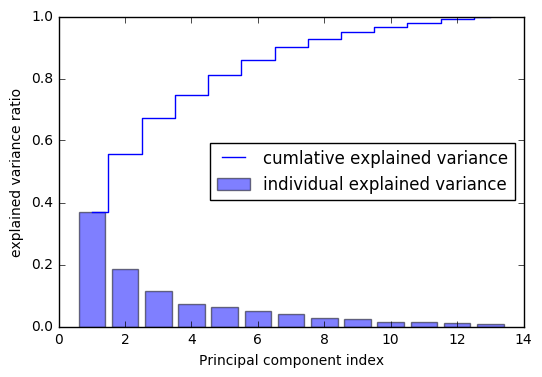

In [26]:
plt.show()

Feature Transformation

In [27]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
              for i in range(len(eigen_vals))]

In [28]:
#sort 
eigen_pairs.sort(key = lambda k:k[0], reverse = True)

In [29]:
w = np.hstack((eigen_pairs[0][1][: ,np.newaxis],
              eigen_pairs[0][1][:, np.newaxis]))

In [30]:
print('Matrix W:\n', w)

Matrix W:
 [[-0.14111692 -0.14111692]
 [ 0.24587005  0.24587005]
 [-0.01632311 -0.01632311]
 [ 0.23869758  0.23869758]
 [-0.14614611 -0.14614611]
 [-0.39129532 -0.39129532]
 [-0.41534756 -0.41534756]
 [ 0.3034083   0.3034083 ]
 [-0.30535198 -0.30535198]
 [ 0.0700932   0.0700932 ]
 [-0.32235639 -0.32235639]
 [-0.364504   -0.364504  ]
 [-0.2973556  -0.2973556 ]]


In [31]:
X_train_std[0].dot(w)

array([3.10022565, 3.10022565])

In [32]:
X_train_pca = X_train_std.dot(w)

In [36]:
colors = ['r','b','g']
markers = ['s','x','o']

In [37]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label = l, marker = m)

In [38]:
plt.xlabel('PC 1')

In [39]:
plt.ylabel('PC 2')

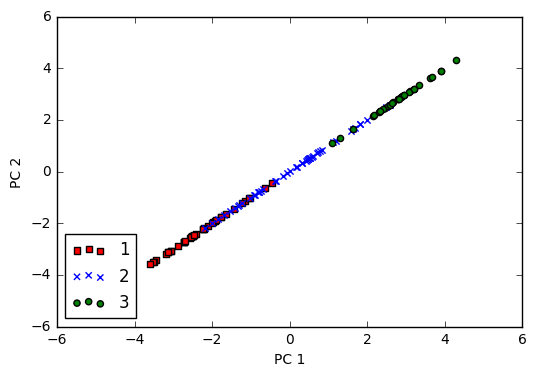

In [40]:
plt.legend(loc = 'lower left')
plt.show()